In [1]:
 library(cowplot)
# for (pop in c("KHS", "Baka", "Himba")){
#     if(pop=="Himba"){n<-713771}
#     if(pop=="Baka"){n<-400893}
#     if(pop=="KHS"){n<-418629}
#     if(pop=="all"){n<-355103}
#     # Read population data
#     population_data <- read.delim(paste0("FUSION_final_SAVE_HSQ/",pop,"_hsq_pos_file4.tsv"))
#      # Print population info
#     print(pop)
#     #print(nrow(population_data)
#     #row_names <- sapply(strsplit(population_data$GENE, "/"), `[`, 1)
#     row_names <- population_data$ID
#     rownames(population_data) <- row_names
#     population_data <- population_data[population_data$HSQ_PV <= .05 ,]
#     population_data <- population_data[population_data$HSQ < 1 & population_data$HSQ > 0,]
#     cat(paste0(pop, " % sites: ", nrow(population_data)/n))
#     cat("\n")
#     assign(paste0(pop, "_data"), population_data) }
# nrow(Himba_data)
# nrow(Baka_data)
# nrow(KHS_data)
# head(Baka_data)

# KHS_meqtl_cpgs <- rownames(KHS_data)
# Baka_meqtl_cpgs <- rownames(Baka_data)
# Himba_meqtl_cpgs <- rownames(Himba_data)



[1] "KHS"
[1] 34554
                            GENE   HSQ HSQ_PV MODEL MODELCV.R2   HSQ.PV
cg27665769 cg27665769/cg27665769 0.386      0  enet      0.210 0.046500
cg27664687 cg27664687/cg27664687 0.516      0  enet      0.630 0.039900
cg27664085 cg27664085/cg27664085 0.619      0  enet      0.760 0.000255
cg27663200 cg27663200/cg27663200 0.683      0  enet      0.530 0.003530
cg27662611 cg27662611/cg27662611 0.376      0  enet      0.480 0.038600
cg27662540 cg27662540/cg27662540 0.462      0  enet      0.046 0.020000
KHS % sites with sig heritability (p<.05): 0.0815949205621206
[1] "Baka"
[1] 42747
                            GENE   HSQ HSQ_PV MODEL MODELCV.R2   HSQ.PV
cg27664407 cg27664407/cg27664407 0.978      0  enet       0.86 7.64e-03
cg27663476 cg27663476/cg27663476 0.666      0  enet       0.69 1.52e-02
cg27663389 cg27663389/cg27663389 0.965      0  enet       0.89 1.39e-05
cg27662633 cg27662633/cg27662633 0.494      0  enet       0.63 8.36e-03
cg27662505 cg27662505/cg27662505 

png 
  2

[1] 47977

[1] 40737

[1] 34158

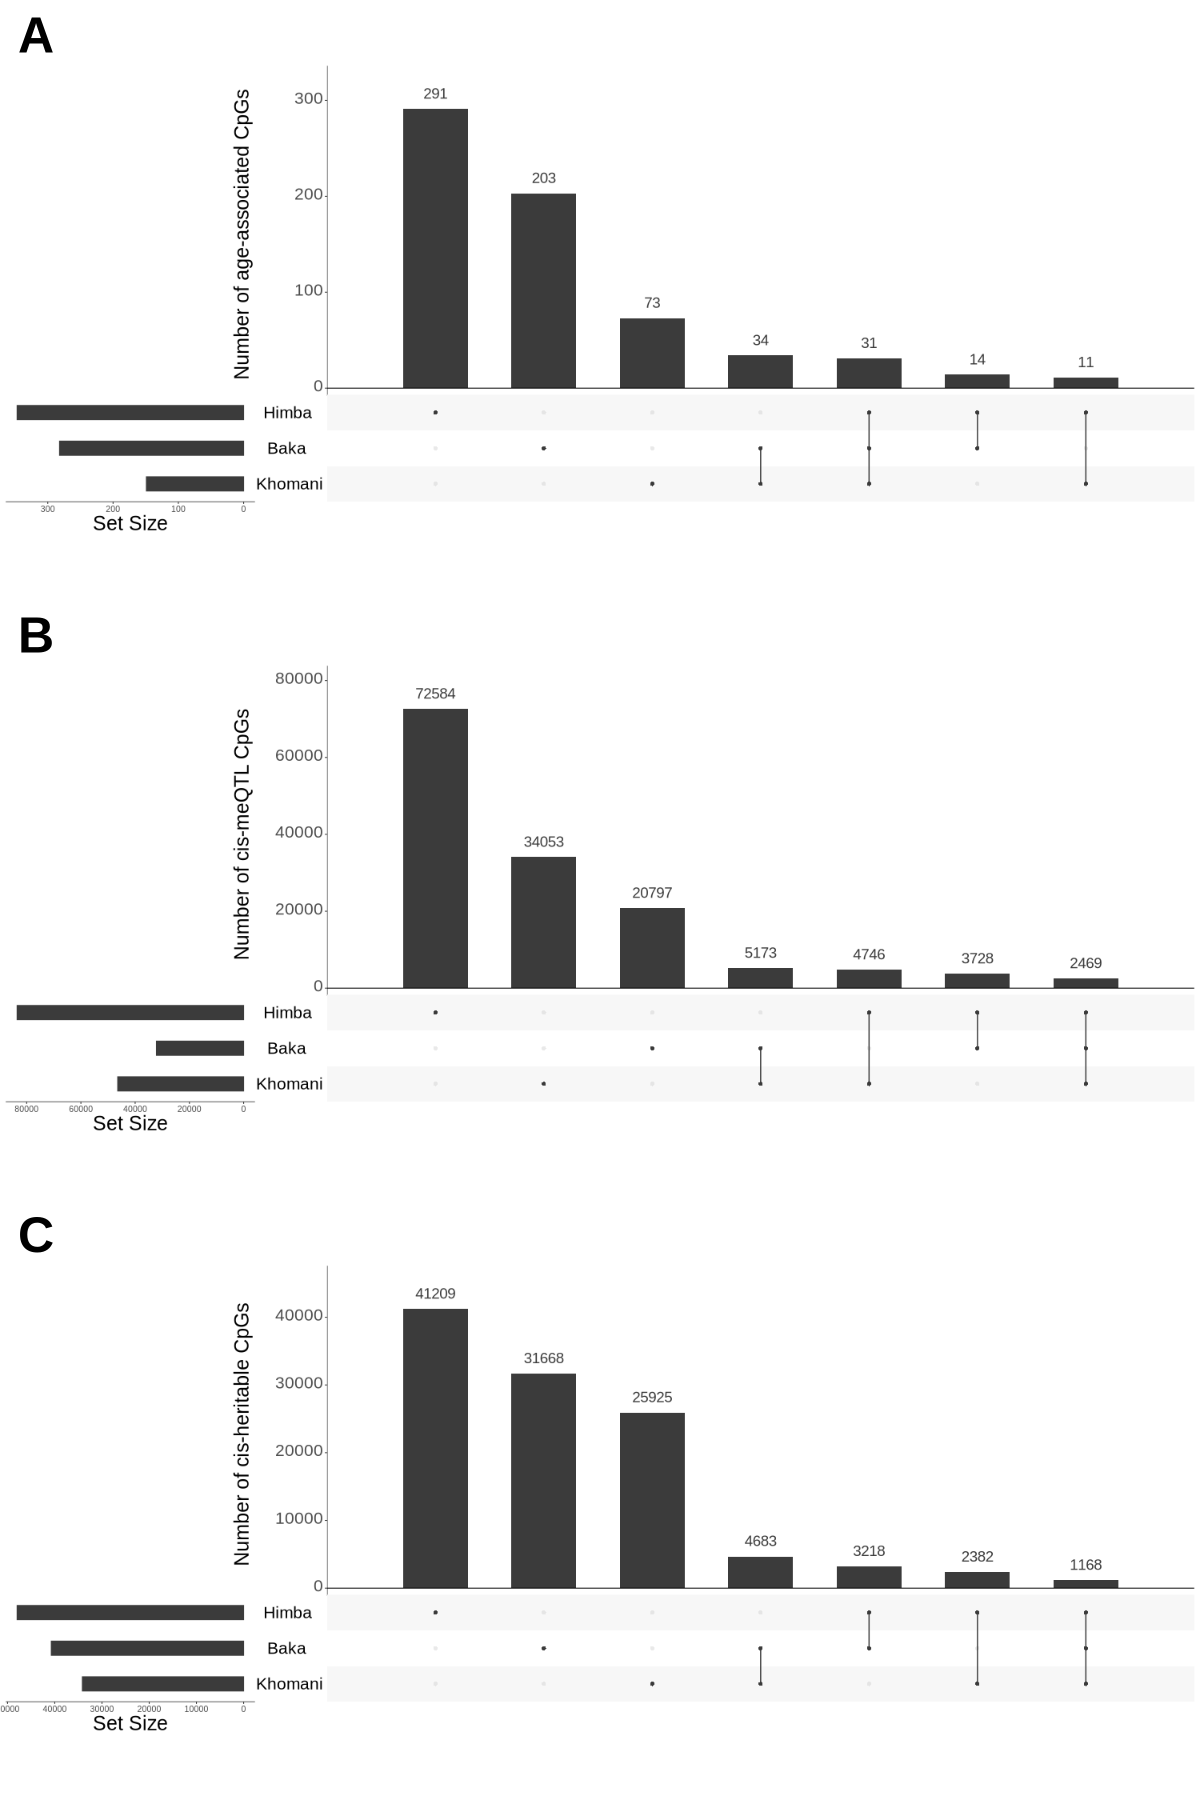

In [22]:
for (pop in c("KHS", "Baka", "Himba")){
    if(pop=="Himba"){n<-713771}
    if(pop=="Baka"){n<-400893}
    if(pop=="KHS"){n<-418629}
    if(pop=="all"){n<-355103}
    # Read population data
    population_data <- read.delim(paste0("FUSION_results_FINAL/",pop,"_R2_hsq_4.tsv"))
     # Print population info
    print(pop)
    #print(nrow(population_data))
    print(nrow(population_data))
    row_names <- sapply(strsplit(population_data$GENE, "/"), `[`, 1)
    rownames(population_data) <- row_names
    print(head(population_data))
    population_data <- population_data[population_data$HSQ.PV <= .05 & population_data$HSQ < 1,]
    number_heritable_sites <- nrow(population_data)
    cat(paste0(pop, " % sites with sig heritability (p<.05): ", number_heritable_sites/n))
    cat("\n")
  
    assign(paste0(pop, "_data"), population_data)
     }

Himba_meqtl_cpgs <- rownames(Himba_data)
Baka_meqtl_cpgs <- rownames(Baka_data) 
KHS_meqtl_cpgs <- rownames(KHS_data)  

library(UpSetR)
library(grid)
cpg_lists <- list(
  Khomani = KHS_meqtl_cpgs,
  Baka = Baka_meqtl_cpgs,
  Himba = Himba_meqtl_cpgs
  #All = all_meqtl_cpgs
)


options(repr.plot.width = 20, repr.plot.height = 7)

# Convert the list to a data frame suitable for UpSetR
cpg_df <- fromList(cpg_lists)
upset_plot_3 <- upset(cpg_df, 
                    sets = c("Khomani", "Baka", "Himba"), 
                    order.by = "freq", 
                    keep.order = TRUE,
                     mainbar.y.label = "Number of cis-heritable CpGs",
                    text.scale = c(3,3, 3, 1.5, 3, 3))


# Save the UpSet plot as an image
png("upset_plot.png", width = 1500, height = 600)
upset_plot_3
dev.off()
#upset_plot_3
# Read the image back in as a grob
upset_plot_3 <- rasterGrob(png::readPNG("upset_plot.png"), interpolate = TRUE)

length(Himba_meqtl_cpgs)
length(Baka_meqtl_cpgs)
length(KHS_meqtl_cpgs)

library(cowplot)
load("/share/hennlab/users/glmeeks/age_methylation/methylation_norm_EWAS/EMMAX/meQTL_cpgs.RData")
upset_plot_2 <- upset_plot
load("/share/hennlab/users/glmeeks/age_methylation/methylation_norm_EWAS/EMMAX/age_cpgs.RData")

options(repr.plot.width = 10, repr.plot.height = 15)

plot_grid(upset_plot, upset_plot_2, upset_plot_3, nrow = 3, rel_heights=c(1,1,1),labels = c("A", "B", "C"),
                    label_size = 30) 


Attaching package: 'patchwork'


The following object is masked from 'package:cowplot':

    align_plots




[1] 47977
[1] 40737
[1] 34158


[1] 4386

[1] 4386

Warning message in geom_text(aes(x = 1, y = 0, label = correlation_text), hjust = 1, :
"All aesthetics have length 1, but the data has 4386 rows.
i Please consider using `annotate()` or provide this layer with data containing a single row."
Warning message in geom_text(aes(x = 1, y = 0, label = correlation_text), hjust = 1, :
"All aesthetics have length 1, but the data has 5851 rows.
i Please consider using `annotate()` or provide this layer with data containing a single row."
Warning message in geom_text(aes(x = 1, y = 0, label = correlation_text), hjust = 1, :
"All aesthetics have length 1, but the data has 3550 rows.
i Please consider using `annotate()` or provide this layer with data containing a single row."


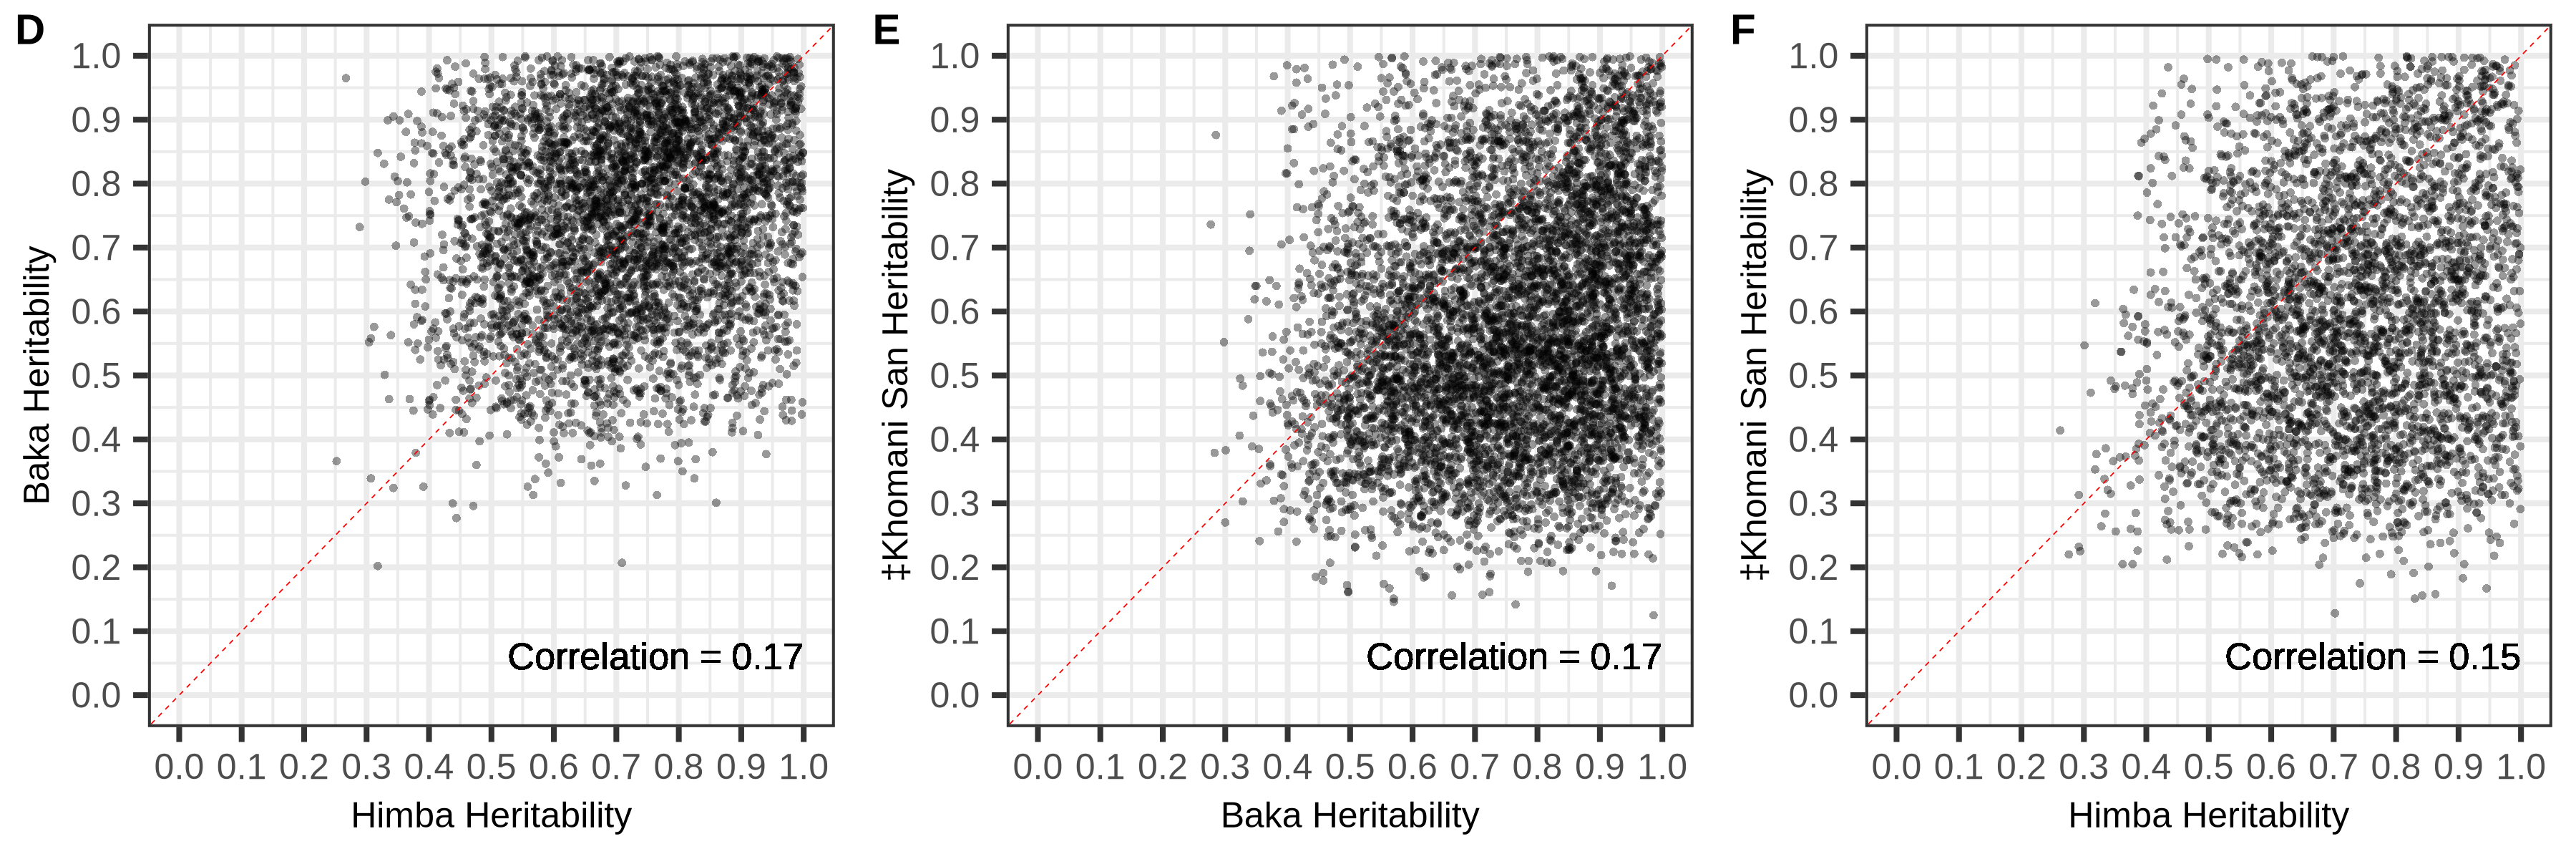

In [3]:
library(ggplot2)
library(patchwork)
himba_data <- Himba_data
baka_data <- Baka_data
khs_data <- KHS_data

print(nrow(himba_data))
print(nrow(baka_data))
print(nrow(khs_data))
# himba_sig <- rownames(Himba_data[Himba_data$HSQ_PV <= .05 ,])
# baka_sig <- rownames(Baka_data[Baka_data$HSQ_PV <= .05 ,])
# khs_sig <- rownames(KHS_data[KHS_data$HSQ_PV <= .05 ,])

# print(length(himba_sig))
# print(length(baka_sig))
# print(length(khs_sig))
#Find common row names between Himba and Baka data frames
common_Himba_Baka <- rownames(himba_data)[rownames(himba_data) %in% rownames(baka_data)]
common_Himba_KHS <- rownames(himba_data)[rownames(himba_data) %in% rownames(khs_data)]
common_Baka_KHS <- rownames(baka_data)[rownames(baka_data) %in% rownames(khs_data)]
length(common_Himba_Baka)
# common_all_three <- Reduce(intersect, lapply(list(baka_data, khs_data, himba_data), rownames))
# common_all_Himba <-  Reduce(intersect, lapply(list(himba_data, all_data), rownames))
# common_all_Baka <-  Reduce(intersect, lapply(list(baka_data, all_data), rownames))
# common_all_KHS <-  Reduce(intersect, lapply(list(khs_data, all_data), rownames))


# common_Himba_Baka <- unique(c(himba_sig, baka_sig))
# common_Himba_KHS <- unique(c(himba_sig, khs_sig))
# common_Baka_KHS <- unique(c(baka_sig, khs_sig))



# Create a function to generate scatter plots for pairwise comparisons with enhanced theme
plot_pairwise_comparison <- function(data1, data2, pop1, pop2) {
 
  # Calculate correlation
  correlation <- cor.test(data1, data2)
  correlation_text <- paste("Correlation =", round(correlation$estimate, 2))
  
  ggplot(data = data.frame(HSQ1 = data1, HSQ2 = data2), aes(x = HSQ1, y = HSQ2)) +
    geom_point(size = 3, alpha=0.4, pch=16) +
    geom_abline(intercept = 0, slope = 1, color = "red", linetype = "dashed") +  # Add one-to-one line
    labs(x = paste(pop1, "Heritability"), y = paste(pop2, "Heritability")) +
      theme_bw(base_size = 50) + 
  theme(legend.position = "none",
         axis.text = element_text(size = 30),
        axis.title = element_text(size = 30, margin = margin(r = 10)),
        plot.title = element_text(size = 50 ), plot.margin = margin(t = 20, r = 20, b = 20, l = 20)) +
    scale_y_continuous(limits = c(0, 1), breaks = seq(0, 1, by = 0.1)) +  # Set y-axis labels from 0 to 1 by 0.1
    scale_x_continuous(limits = c(0, 1), breaks = seq(0, 1, by = 0.1)) +  # Set x-axis labels from 0 to 1 by 0.1
    geom_text(aes(x = 1, y = 0, label = correlation_text), hjust = 1, vjust = -1, size = 11, color = "black")# Add correlation to the bottom right
    # coord_fixed()  # Fix the aspect ratio to ensure the plot is square
}
# Generate the plots
length(himba_data[common_Himba_Baka, "HSQ"])
plot_Himba_Baka <- plot_pairwise_comparison(himba_data[common_Himba_Baka, "HSQ"], baka_data[common_Himba_Baka, "HSQ"], "Himba", "Baka")
plot_Himba_KHS <- plot_pairwise_comparison(himba_data[common_Himba_KHS, "HSQ"], khs_data[common_Himba_KHS, "HSQ"], "Himba", "\u2021Khomani San")
plot_Baka_KHS <- plot_pairwise_comparison(baka_data[common_Baka_KHS, "HSQ"], khs_data[common_Baka_KHS, "HSQ"],"Baka", "\u2021Khomani San")
# plot_all_Himba <- plot_pairwise_comparison(all_data[common_all_Himba, "HSQ"], Himba_data[common_all_Himba, "HSQ"], "all", "Himba")
# plot_all_KHS <- plot_pairwise_comparison(all_data[common_all_KHS, "HSQ"], KHS_data[common_all_KHS, "HSQ"], "all", "Khomani")
# plot_all_Baka <- plot_pairwise_comparison(all_data[common_all_Baka, "HSQ"], Baka_data[common_all_Baka, "HSQ"], "all", "Baka")
#svg("/share/hennlab/users/glmeeks/age_methylation/FUSION/pop_pairwise_heritability.svg", width = 30, height = 30)
combined_plot <- plot_grid(plot_Himba_Baka, plot_Baka_KHS, plot_Himba_KHS, ncol = 3, labels = c("D", "E", "F"),
                    label_size = 35)
#/(plot_all_Himba | plot_all_KHS | plot_all_Baka)
options(repr.plot.width = 30, repr.plot.height = 10)

print(combined_plot)

In [4]:
cor.test(himba_data[common_Himba_Baka, "HSQ"], baka_data[common_Himba_Baka, "HSQ"])
cor.test(himba_data[common_Himba_KHS, "HSQ"], khs_data[common_Himba_KHS, "HSQ"])
cor.test(khs_data[common_Baka_KHS, "HSQ"], baka_data[common_Baka_KHS, "HSQ"])


	Pearson's product-moment correlation

data:  himba_data[common_Himba_Baka, "HSQ"] and baka_data[common_Himba_Baka, "HSQ"]
t = 11.558, df = 4384, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1430897 0.2005333
sample estimates:
      cor 
0.1719577 



	Pearson's product-moment correlation

data:  himba_data[common_Himba_KHS, "HSQ"] and khs_data[common_Himba_KHS, "HSQ"]
t = 8.7358, df = 3548, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1127480 0.1771588
sample estimates:
      cor 
0.1451071 



	Pearson's product-moment correlation

data:  khs_data[common_Baka_KHS, "HSQ"] and baka_data[common_Baka_KHS, "HSQ"]
t = 13.31, df = 5849, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1464787 0.1962213
sample estimates:
      cor 
0.1714592 


In [5]:
# args <- commandArgs(trailingOnly = TRUE)
# pop1 <- as.character(args[1])
# #pop <- "KHS"

# #need to re-run it to not just include snps with the same model in both populations.
#     population_data <- read.delim(paste0("FUSION_final_SAVE_HSQ/",pop,"_R2_hsq_4.tsv"))
#     head(population_data)
#      row_names <- sapply(strsplit(population_data$GENE, "/"), `[`, 1)
#     rownames(population_data) <- row_names  
#     population_data <- population_data[population_data$HSQ.PV <= .05 & population_data$HSQ < 1 & population_data$HSQ > 0,]

#     output_file <- file(paste0(pop, "_fusion_snp_effects_final_save_hsq.txt"), "w")
#     cat("Site\tModel\t\tSNP\teffect\n", file = output_file)
#          for (sig_sites in head(rownames(population_data))) {
             
#                 pop_model <- population_data[rownames(population_data) == sig_sites, "MODEL"]
#                 print(pop_model)
#                     load(paste0("FUSION_final_SAVE_HSQ/", pop, "/", sig_sites, "/", sig_sites, ".wgt.RDat"))
#                      pop_wgt <- wgt.matrix
#                      if(pop_model == "susie") { 
#                       pop_susie <- susiefit
#                       best_model_wgts_pop <- pop_susie$pip[pop_susie$pip>.9]
#                      print(best_model_wgts_pop1 )
#                      }
#                      if(pop_model %in% c("enet", "lasso", "top1")){
#                         best_model_wgts_pop <-  pop_wgt[, colnames( pop_wgt) == pop_model]  
#                         best_model_wgts_pop <- best_model_wgts_pop[abs(best_model_wgts_pop)!= 0]
#                          print( best_model_wgts_pop )
#                          }
#                          # Iterate over the named effects and write each one as a row
#                       for (snp in names(best_model_wgts_pop)) {
#                         effect <- best_model_wgts_pop[snp]
#                         cat(sig_sites, pop_model, snp, effect, sep = "\t", file = output_file, append = TRUE)
#                         cat("\n", file = output_file, append = TRUE)
#                       }
#                     }
         

#  close(output_file)


In [6]:
library(ggplot2)
library(cowplot) # For arranging plots
library(dplyr)
# Read data from files
Himba <- read.delim("Himba_fusion_snp_effects_final_save_hsq.txt", sep="")
Baka <- read.delim("Baka_fusion_snp_effects_final_save_hsq.txt", sep="")
KHS <- read.delim("KHS_fusion_snp_effects_final_save_hsq.txt", sep="")

#Himba$id <- paste0(Himba$Site, "_", Himba$SNP, "_", Himba$Model)
Himba$id <- paste0(Himba$Site, "_", Himba$SNP)
Himba$pop <- "Himba"
#Baka$id <- paste0(Baka$Site, "_", Baka$SNP, "_", Baka$Model)
Baka$id <- paste0(Baka$Site, "_", Baka$SNP)
Baka$pop <- "Baka"
#KHS$id <- paste0(KHS$Site, "_", KHS$SNP, "_", KHS$Model)
KHS$id <- paste0(KHS$Site, "_", KHS$SNP)
KHS$pop <- "KHS"

head(Himba)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




,Site,Model,SNP,effect,id,pop
,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
1,cg27665377,enet,2:120271783:C:T,-0.025948550,cg27665377_2:120271783:C:T,Himba
2,cg27665377,enet,2:120273602:T:C,-0.020238990,cg27665377_2:120273602:T:C,Himba
3,cg27665377,enet,2:120274184:T:G,-0.017002690,cg27665377_2:120274184:T:G,Himba
4,cg27665377,enet,2:120274576:C:A,-0.014525660,cg27665377_2:120274576:C:A,Himba
5,cg27665377,enet,2:120276170:A:G,-0.064942560,cg27665377_2:120276170:A:G,Himba
6,cg27665377,enet,2:120278171:C:T,0.005648946,cg27665377_2:120278171:C:T,Himba


In [7]:
Himba_Baka <- rbind(Himba[Himba$id %in% Baka$id,], Baka[Baka$id %in% Himba$id,])
Himba_KHS <- rbind(Himba[Himba$id %in% KHS$id,], KHS[KHS$id %in% Himba$id,])
Baka_KHS <- rbind(Baka[Baka$id %in% KHS$id,], KHS[KHS$id %in% Baka$id,])


In [8]:
# Scale the effect within each Model type
Himba_Baka <- Himba_Baka  %>%
  group_by(Model) %>%
  mutate(scaled_effect = scale(effect)) %>%
  ungroup()

Himba_KHS <- Himba_KHS  %>%
  group_by(Model) %>%
  mutate(scaled_effect = scale(effect)) %>%
  ungroup()

Baka_KHS <- Baka_KHS  %>%
  group_by(Model) %>%
  mutate(scaled_effect = scale(effect)) %>%
  ungroup()



In [9]:
library(tidyr)
library(dplyr)

Himba_Baka_summary <- Himba_Baka %>%
  pivot_wider(
    id_cols = c(Site, SNP, id),
    names_from = pop,
    values_from = c(Model, effect, scaled_effect)
  )


Himba_KHS_summary <- Himba_KHS %>%
  pivot_wider(
    id_cols = c(Site, SNP, id),
    names_from = pop,
    values_from = c(Model, effect, scaled_effect)
  )

# Reshape the data using pivot_wider
Baka_KHS_summary <- Baka_KHS %>%
  pivot_wider(
    id_cols = c(Site, SNP, id),
    names_from = pop,
    values_from = c(Model, effect, scaled_effect)
  )


In [10]:
nrow(Baka_KHS_summary)
nrow(Himba_KHS_summary)
nrow(Himba_Baka_summary)
head(Baka_KHS_summary)
max(Baka_KHS_summary$scaled_effect_Baka)


[1] 38830

[1] 16029

[1] 17452

Site,SNP,id,Model_Baka,Model_KHS,effect_Baka,effect_KHS,scaled_effect_Baka,scaled_effect_KHS
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,"<dbl[,1]>","<dbl[,1]>"
cg27657169,5:60951124:A:G,cg27657169_5:60951124:A:G,enet,enet,-0.001607653,-0.045705690,-0.01663913,-0.8298847
cg27639662,4:80812960:G:A,cg27639662_4:80812960:G:A,enet,enet,-0.029117460,0.007027172,-0.52396846,0.1426023
cg27639662,4:81104609:G:A,cg27639662_4:81104609:G:A,enet,enet,0.179788300,0.095858020,3.32862195,1.7807997
cg27639575,16:88691401:G:A,cg27639575_16:88691401:G:A,enet,enet,0.016275480,-0.090873410,0.31315736,-1.6628570
cg27639575,16:88693051:G:A,cg27639575_16:88693051:G:A,enet,enet,0.013686410,-0.080953510,0.26541035,-1.4799166
cg27639575,16:89393562:T:C,cg27639575_16:89393562:T:C,enet,enet,0.006164651,0.058495490,0.12669585,1.0917688


[1] 12.04468

Warning message in geom_text(aes(x = max(scaled_effect_Himba) - 5, y = min(scaled_effect_Baka), :
"All aesthetics have length 1, but the data has 17452 rows.
i Please consider using `annotate()` or provide this layer with data containing a single row."
Warning message in geom_text(aes(x = max(scaled_effect_Baka) - 5, y = min(scaled_effect_KHS), :
"All aesthetics have length 1, but the data has 38830 rows.
i Please consider using `annotate()` or provide this layer with data containing a single row."
Warning message in geom_text(aes(x = max(scaled_effect_Himba) - 5, y = min(scaled_effect_KHS), :
"All aesthetics have length 1, but the data has 16029 rows.
i Please consider using `annotate()` or provide this layer with data containing a single row."


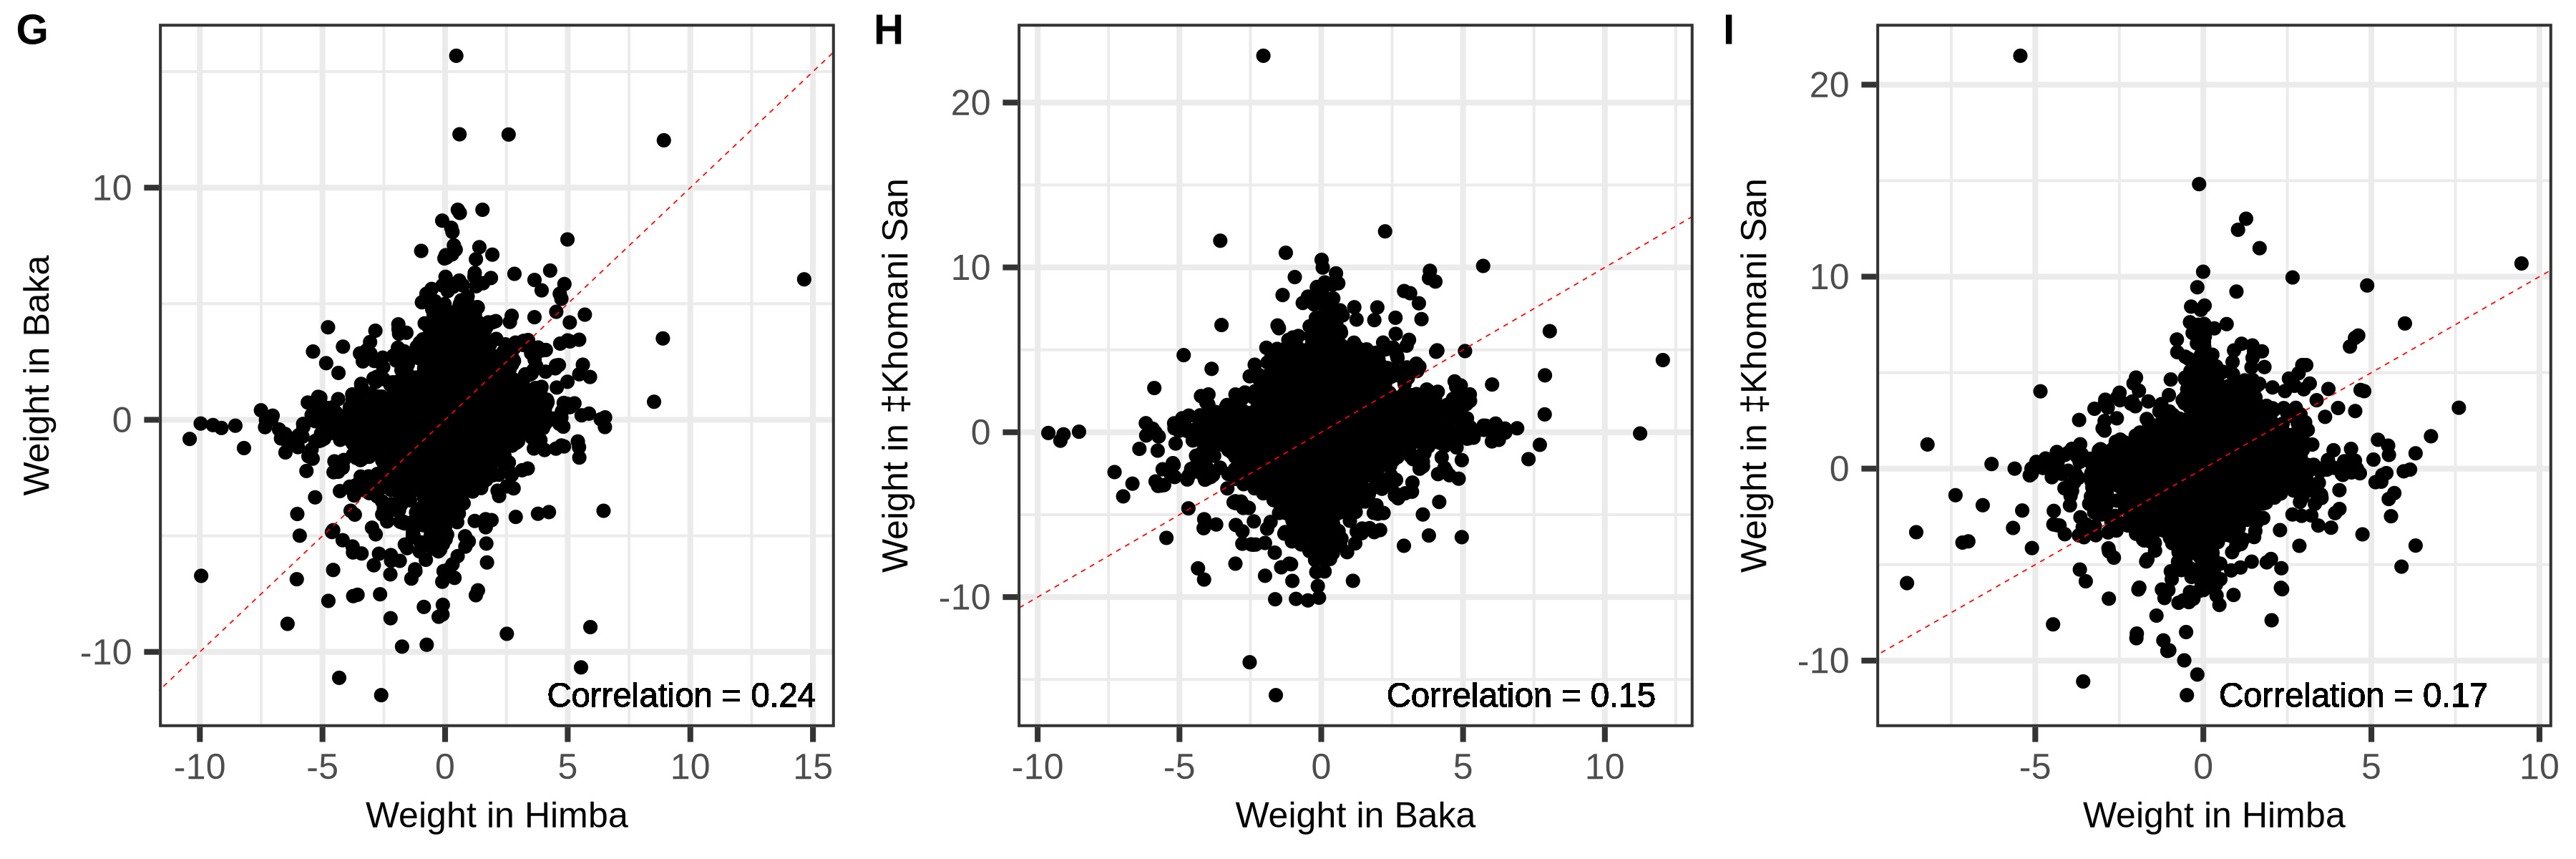

In [11]:
# Calculate the correlation coefficient and p-value for Himba_Baka
correlation_himba_baka <- cor.test(Himba_Baka_summary$scaled_effect_Himba, Himba_Baka_summary$scaled_effect_Baka)

# Create the scatter plot for Himba_Baka
scatter_plot_himba_baka <- ggplot(Himba_Baka_summary, aes(x = scaled_effect_Himba, y = scaled_effect_Baka)) +
  geom_point( size = 5, color = "black") +  # Black points
  geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "red") +  # Add one-to-one line
  labs(x = "Weight in Himba", y = "Weight in Baka") +  # Label axes
       theme_bw(base_size = 50) + 
  theme(legend.position = "none",
         axis.text = element_text(size = 30),
        axis.title = element_text(size = 30, margin = margin(r = 10)),
        plot.title = element_text(size = 50 ), plot.margin = margin(t = 20, r = 20, b = 20, l = 20)) +
 geom_text(aes(x = max(scaled_effect_Himba)-5, y = min(scaled_effect_Baka), 
                label = paste("Correlation =", round(correlation_himba_baka$estimate[[1]], 2))),
            size = 10, color = "black") # Set colors for Model

correlation_himba_khs <- cor.test(Himba_KHS_summary$scaled_effect_Himba, Himba_KHS_summary$scaled_effect_KHS)
# Create the scatter plot for Himba_KHS
scatter_plot_himba_khs <- ggplot(Himba_KHS_summary, aes(x = scaled_effect_Himba, y = scaled_effect_KHS)) +
  geom_point( size = 5, color = "black") +  # Black points
  geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "red") +  # Add one-to-one line
  labs(x = "Weight in Himba", y = "Weight in \u2021Khomani San") +  # Label axes
        theme_bw(base_size = 50) + 
  theme(legend.position = "none",
         axis.text = element_text(size = 30),
        axis.title = element_text(size = 30, margin = margin(r = 10)),
        plot.title = element_text(size = 50 ), plot.margin = margin(t = 20, r = 20, b = 20, l = 20)) +
 geom_text(aes(x = max(scaled_effect_Himba)-5, y = min(scaled_effect_KHS), 
                label = paste("Correlation =", round(correlation_himba_khs$estimate[[1]], 2))),
            size = 10, color = "black") # Set colors for Model

correlation_baka_khs <- cor.test(Baka_KHS_summary$scaled_effect_Baka, Baka_KHS_summary$scaled_effect_KHS)
# Create the scatter plot for baka_KHS
scatter_plot_khs_baka <- ggplot(Baka_KHS_summary, aes(x = scaled_effect_Baka, y = scaled_effect_KHS)) +
  geom_point( size = 5, color = "black") +  # Black points
  geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "red") +  # Add one-to-one line
  labs(x = "Weight in Baka", y = "Weight in \u2021Khomani San") +  # Label axes
        theme_bw(base_size = 50) + 
  theme(legend.position = "none",
         axis.text = element_text(size = 30),
        axis.title = element_text(size = 30, margin = margin(r = 10)),
        plot.title = element_text(size = 50 ), plot.margin = margin(t = 20, r = 20, b = 20, l = 20)) +
 geom_text(aes(x = max(scaled_effect_Baka)-5, y = min(scaled_effect_KHS), 
                label = paste("Correlation =", round(correlation_baka_khs$estimate[[1]], 2))),
            size = 10, color = "black") # Set colors for Model



options(repr.plot.width = 30, repr.plot.height = 10)

# Print the scatter plots side by side
combined_plot2 <- plot_grid(scatter_plot_himba_baka, scatter_plot_khs_baka, scatter_plot_himba_khs, 
          ncol = 3, labels = c("G", "H", "I"), label_size = 35)

combined_plot2

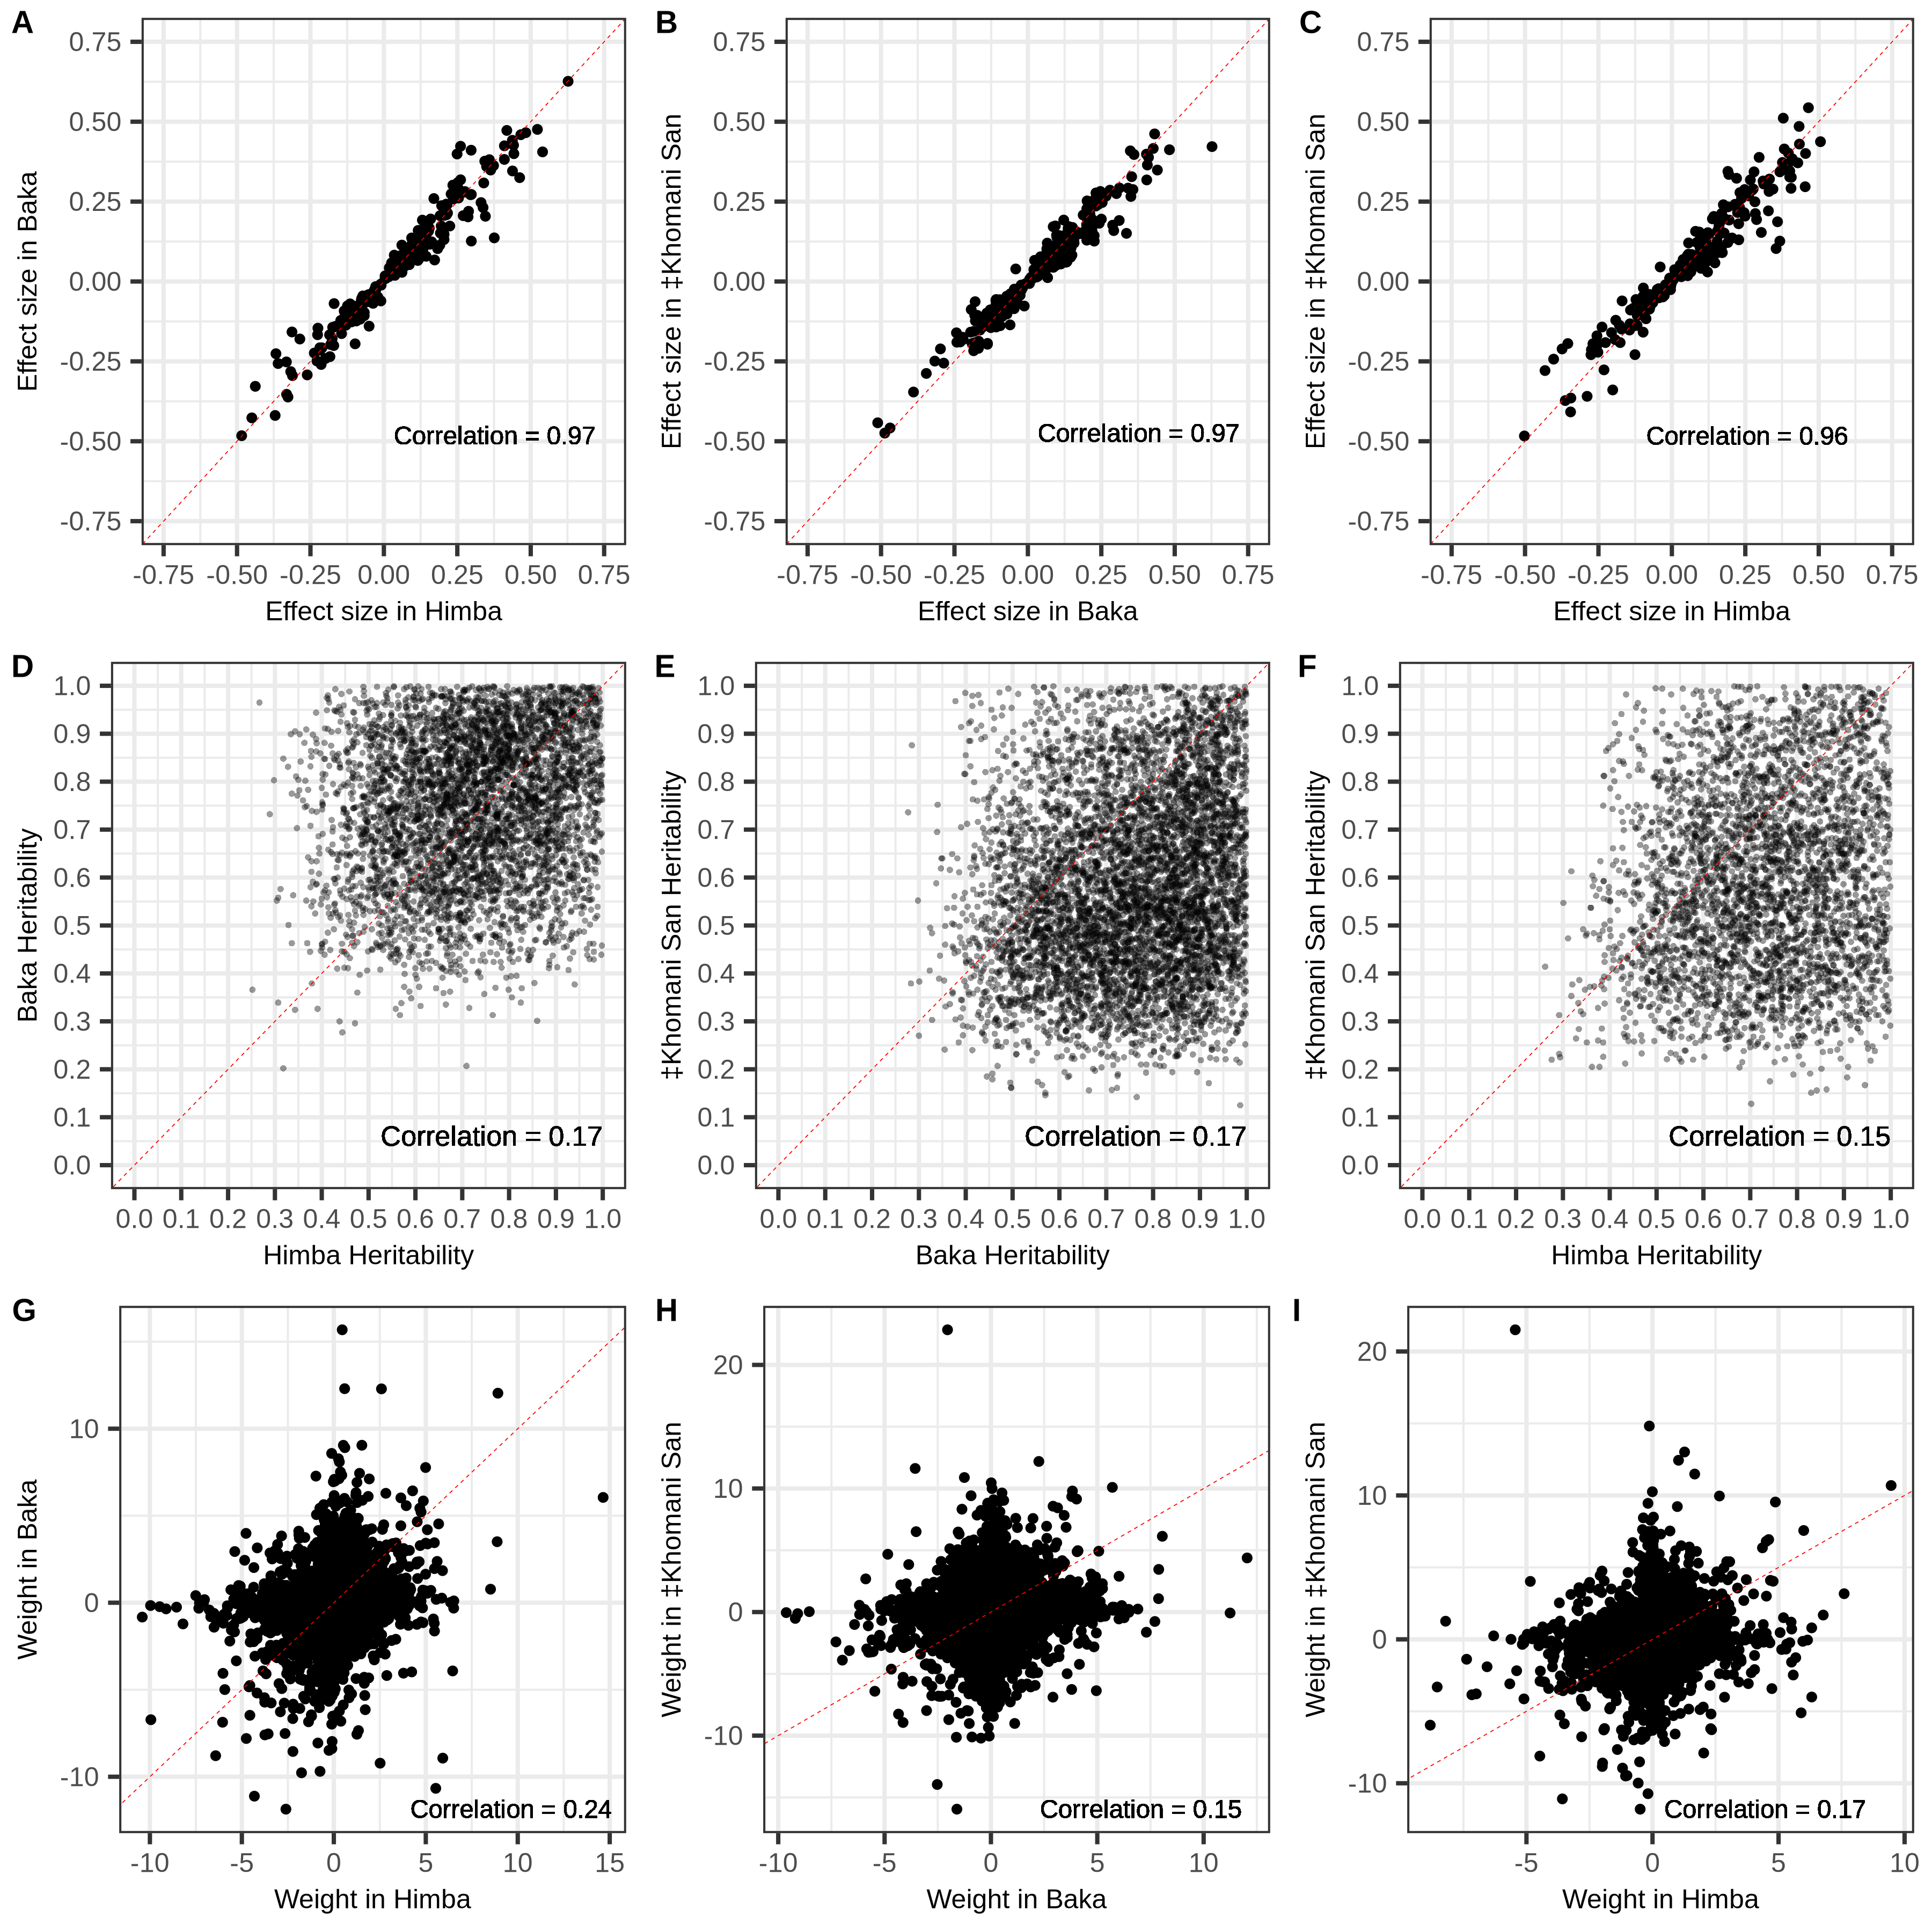

In [12]:
load("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/meqtl_effect_corrs.RData")

options(repr.plot.width = 30, repr.plot.height = 30)
#svg("Figure3.svg", width=30, height=20)
plot_grid(combined_plot3, combined_plot, combined_plot2, nrow=3)

In [ ]:


# # Calculate the correlation coefficient and p-value for KHS vs Baka
# correlation_khs_baka_top1 <- cor.test(KHS_Baka[KHS_Baka$Model == "top1", "effect_pop1"], KHS_Baka[KHS_Baka$Model == "top1", "effect_pop2"])
# correlation_khs_baka_enet <- cor.test(KHS_Baka[KHS_Baka$Model == "enet", "effect_pop1"], KHS_Baka[KHS_Baka$Model == "enet", "effect_pop2"])

# scatter_plot_khs_baka <- ggplot(KHS_Baka, aes(x = effect_pop1, y = effect_pop2, color = Model)) +
#   geom_point(data = subset(KHS_Baka, Model == "enet"), size = 5, color = "black") +  # Black points
#   geom_point(data = subset(KHS_Baka, Model == "top1"), size = 5, color = "red") +   # Red points
#   geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "red") +  # Add one-to-one line
#   labs(x = "Weight in Khomani", y = "Weight in Baka") +  # Label axes
#   theme_bw(base_size = 35) +  # Increase font size and use minimal theme
#   theme(text = element_text(size = 35, face = "bold"), legend.position = "none") +  # Increase font size of text elements
#   geom_text(aes(x = max(KHS_Baka$effect_pop1) -8.5, y = min(KHS_Baka$effect_pop2) + 1.7, 
#                 label = paste("Correlation (enet) =", round(correlation_khs_baka_enet$estimate, 2))),                         
#             size = 10, color = "black") + 

#   geom_text(aes(x = max(KHS_Baka$effect_pop1) -8.5, y = min(KHS_Baka$effect_pop2), 
#                 label = paste("Correlation (top1) =", round(correlation_khs_baka_top1$estimate, 2))),
#             size = 10, color = "red") 

# # Calculate the correlation coefficient and p-value for Himba vs KHS
# correlation_himba_khs_top1 <- cor.test(Himba_KHS[Himba_KHS$Model == "top1", "effect_pop1"], Himba_KHS[Himba_KHS$Model == "top1", "effect_pop2"])
# correlation_himba_khs_enet <- cor.test(Himba_KHS[Himba_KHS$Model == "enet", "effect_pop1"], Himba_KHS[Himba_KHS$Model == "enet", "effect_pop2"])

# scatter_plot_himba_khs <- ggplot(Himba_KHS, aes(x = effect_pop1, y = effect_pop2, color = Model)) +
#   geom_point(data = subset(Himba_KHS, Model == "enet"), size = 5, color = "black") +  # Black points
#   geom_point(data = subset(Himba_KHS, Model == "top1"), size = 5, color = "red") +   # Red points
#   geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "red") +  # Add one-to-one line
#   labs(x = "Weight in Himba", y = "Weight in Khomani") +  # Label axes
#   theme_bw(base_size = 35) +  # Increase font size and use minimal theme
#   theme(text = element_text(size = 35, face = "bold")) +  # Increase font size of text elements
#   geom_text(aes(x = max(Himba_KHS$effect_pop1) -7.5, y = min(Himba_KHS$effect_pop2) + 1.7, 
#                 label = paste("Correlation (enet) =", round(correlation_himba_khs_enet$estimate, 2))),                         
#             size = 10, color = "black") + 
# geom_text(aes(x = max(Himba_KHS$effect_pop1) -7.5, y = min(Himba_KHS$effect_pop2), 
#                 label = paste("Correlation (top1) =", round(correlation_himba_khs_top1$estimate, 2))),
#             size = 10, color = "red") 



# Print the scatter plots side by side
# combined_plot2 <- plot_grid(scatter_plot_himba_baka, scatter_plot_khs_baka, scatter_plot_himba_khs, 
#           ncol = 3, labels = c("D", "E", "F"), label_size = 35)



In [ ]:

options(repr.plot.width = 30, repr.plot.height = 20)
#svg("Figure3.svg", width=30, height=20)
plot_grid(combined_plot, combined_plot2, nrow=2)
#dev.off()

In [ ]:
correlation_himba_khs_top1 <- cor.test(Himba_KHS[Himba_KHS$Model == "top1", "effect_pop1"], Himba_KHS[Himba_KHS$Model == "top1", "effect_pop2"])
correlation_himba_khs_top1$estimate [[1]]

In [ ]:
nrow(Himba_Baka)
nrow(KHS_Baka)
nrow(Himba_KHS)
print("Himba Baka")
table(Himba_Baka$Model)
print("KHS Baka")
table(KHS_Baka$Model)
print("Himba KHS")
table(Himba_KHS$Model)

cor.test(Himba_KHS[Himba_KHS$Model=="enet", "effect_pop1"], Himba_KHS[Himba_KHS$Model=="enet", "effect_pop2"])
         

cor.test(Himba_KHS[Himba_KHS$Model=="top1", "effect_pop1"], Himba_KHS[Himba_KHS$Model=="top1", "effect_pop2"])                